In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.ensemble import VotingRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
dataset = pd.read_csv('train_chennai_sale.csv')

In [ ]:
#dropped part id because it is unique; reg fee and commission are calculated after the sale price has been decided.
dataset.drop(['PRT_ID', 'MZZONE', 'REG_FEE', 'COMMIS'], axis=1, inplace=True)

In [ ]:
#converting the date into year
dataset['DATE_SALE'] = pd.DatetimeIndex(dataset['DATE_SALE']).year
dataset['DATE_BUILD'] = pd.DatetimeIndex(dataset['DATE_BUILD']).year

In [ ]:
dataset.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,ADJ_PRICE
0,Karapakkam,1004,2011,131,1.0,1.0,3,AbNormal,Yes,1967,Commercial,AllPub,Paved,4.0,3.9,4.9,4.330,7600000,7904000.0
1,Anna Nagar,1986,2006,26,2.0,1.0,5,AbNormal,No,1995,Commercial,AllPub,Gravel,4.9,4.2,2.5,3.765,21717770,22586480.8
2,Adyar,909,2012,70,1.0,1.0,3,AbNormal,Yes,1992,Commercial,ELO,Gravel,4.1,3.8,2.2,3.090,13159200,13685568.0
3,Velachery,1855,2010,14,3.0,2.0,5,Family,No,1988,Others,NoSewr,Paved,4.7,3.9,3.6,4.010,9630290,10015501.6
4,Karapakkam,1226,2009,84,1.0,1.0,3,AbNormal,Yes,1979,Others,AllPub,Gravel,3.0,2.5,4.1,3.290,7406250,7702500.0


In [ ]:
#cleaning the spelling mistakes
cleanup_fts = {'AREA' : {'Adyr':'Adyar', 'T Nagar': 'TNagar', 'Karapakam': 'Karapakkam', 'Ana Nagar':'Anna Nagar', 'KKNagar':'KK Nagar', 'Chrompt':'Chrompet', 'Chrmpet':'Chrompet', 'Velchery':'Velachery', 'Ann Nagar':'Anna Nagar', 'Chormpet':'Chrompet'},
               'SALE_COND' : {'Ab Normal': 'AbNormal', 'PartiaLl':'Partial', 'Partiall':'Partial', 'Adj Land':'AdjLand'},
               'BUILDTYPE' : {'Comercial':'Commercial', 'Other':'Others'},
               'UTILITY_AVAIL' : {'All Pub':'AllPub', 'NoSeWa':'NoSewage', 'NoSewr ':'NoSewer'},
               'STREET' : {'Pavd':'Paved', 'NoAccess': 'No Access'},
               'PARK_FACIL' : {'Noo':'No'}}
dataset = dataset.replace(cleanup_fts)

In [ ]:
#filling the missing value with mode because it will give the maximum value of bedroom and bathroom whichver is in the dataset
dataset = dataset.fillna({'N_BEDROOM':dataset['N_BEDROOM'].mode()[0],
                'N_BATHROOM': dataset['N_BATHROOM'].mode()[0]})

In [ ]:
dataset.isnull().any()

AREA             False
INT_SQFT         False
DATE_SALE        False
DIST_MAINROAD    False
N_BEDROOM        False
N_BATHROOM       False
N_ROOM           False
SALE_COND        False
PARK_FACIL       False
DATE_BUILD       False
BUILDTYPE        False
UTILITY_AVAIL    False
STREET           False
QS_ROOMS         False
QS_BATHROOM      False
QS_BEDROOM       False
QS_OVERALL        True
SALES_PRICE      False
ADJ_PRICE        False
dtype: bool

In [ ]:
#filling the missing value with median
dataset = dataset.fillna(dataset['QS_OVERALL'].median())

In [ ]:
#calculating the age of building at the time of sale
dataset['AGE_BUILDING'] = dataset['DATE_SALE'] - dataset['DATE_BUILD']

In [ ]:
dataset.describe()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,ADJ_PRICE,AGE_BUILDING
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7.109000e+03,7109.000000
mean,1382.073006,2009.768181,99.603179,1.636939,1.213110,3.688704,1985.491912,3.517471,3.507244,3.485300,3.503232,1.089491e+07,1.133071e+07,24.276270
std,457.410902,2.205979,57.403110,0.802881,0.409534,1.019099,12.648859,0.891972,0.897834,0.887266,0.525440,3.768603e+06,3.919348e+06,12.334164
min,500.000000,2004.000000,0.000000,1.000000,1.000000,2.000000,1949.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,2.243150e+06,3.000000
25%,993.000000,2008.000000,50.000000,1.000000,1.000000,3.000000,1976.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,8.602984e+06,14.000000
50%,1373.000000,2010.000000,99.000000,1.000000,1.000000,4.000000,1986.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07,1.074845e+07,23.000000
75%,1744.000000,2011.000000,148.000000,2.000000,1.000000,4.000000,1996.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,1.351366e+07,34.000000
max,2500.000000,2015.000000,200.000000,4.000000,2.000000,6.000000,2010.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,2.461403e+07,55.000000


VISUALIZATION OF FTS

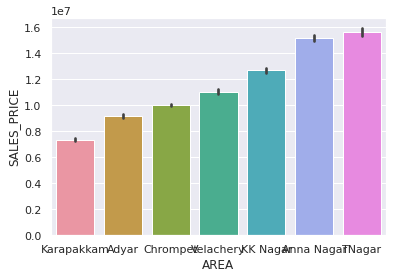

In [ ]:
sns.color_palette()
ax = sns.barplot(x='AREA', y='SALES_PRICE', data = dataset, order=dataset.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])


This graph shows the prices of houses in a particular area. As it is evident that the most expensive houses are in TNagar and the least expensive in Karapakkam

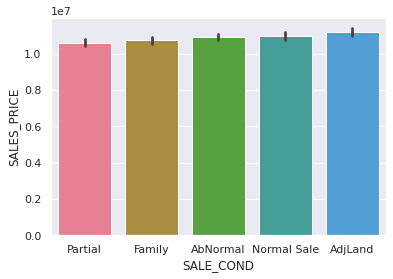

In [ ]:
sns.color_palette()
sns.barplot(x='SALE_COND', y='SALES_PRICE', data = dataset, order=dataset.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

This graph show the price of houses according to the sale condition, the houses are somewhat priced on the same scale no matter the sale condition.

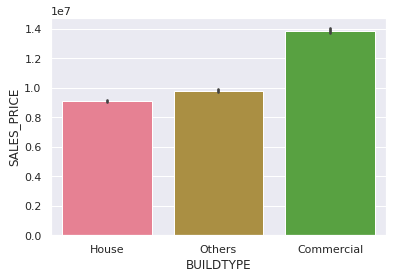

In [ ]:
sns.color_palette()
sns.barplot(x='BUILDTYPE', y='SALES_PRICE', data = dataset, order=dataset.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

The above graph shows the sale price of house according to the build type, houses build for commercial purposes have the highes value

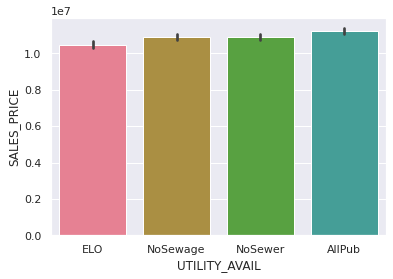

In [ ]:
sns.color_palette()
sns.barplot(x='UTILITY_AVAIL', y='SALES_PRICE', data = dataset, order=dataset.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

The above graph shows the sale price of the house according to the utility available. Again they are in the same bracket, no clear difference in there.

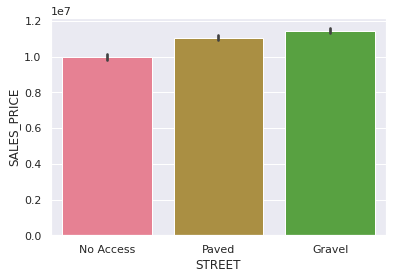

In [ ]:
sns.color_palette()
sns.barplot(x='STREET', y='SALES_PRICE', data = dataset, order=dataset.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

This graph shows the sale price of the house according to the street near the house. 
Houses with graveled street are expensive as compared to houses with paved 
street. 
But the houses with no access to street are also priced somewhere near the other two.

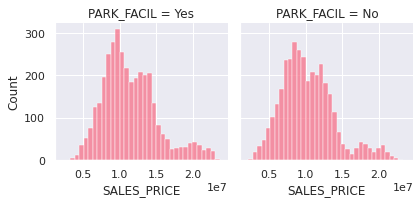

In [ ]:
sns.set_theme(palette='husl')
sns.FacetGrid(dataset, col='PARK_FACIL').map(sns.histplot, 'SALES_PRICE')

The distribution for with park facility and without park facility is almost same but there is a slight decrease in the sales price without park facility.

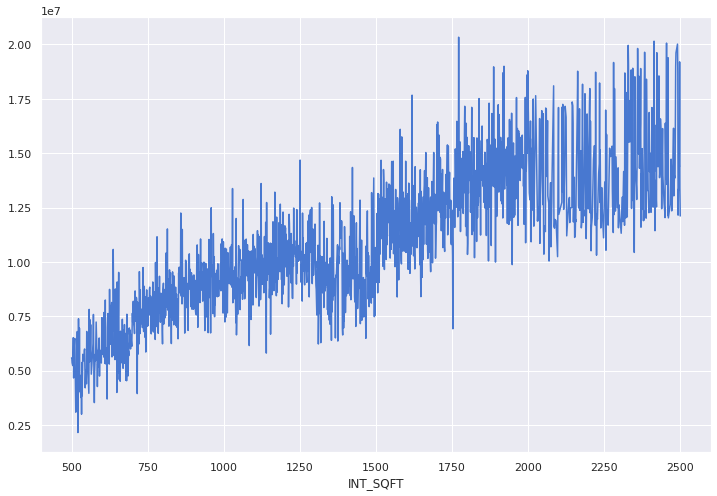

In [ ]:
sns.set_color_codes(palette='muted')
plt.figure(figsize=(12,8))
dataset.groupby('INT_SQFT')['SALES_PRICE'].mean().plot.line(color='b')

The above graph shows a linear relationship between sqft and sales price and also we can see that as the sqft increase so does the price of the house.

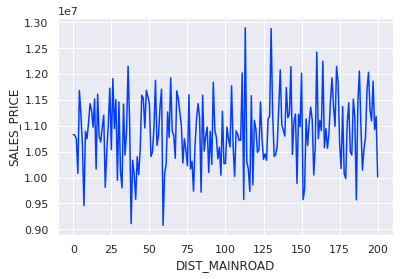

In [ ]:
#there is not a clear relationship between the sales price and distance from mainroad because the prices are fluctuating therefore, we can't really say if this plays a vital role in defining our target variable.
sns.lineplot(x='DIST_MAINROAD', y='SALES_PRICE', ci = None, data=dataset, color='b')

There is not a clear relationship between the sales price and distance from mainroad because the prices are fluctuating therefore, we can't really say if this plays a vital role in defining our target variable.

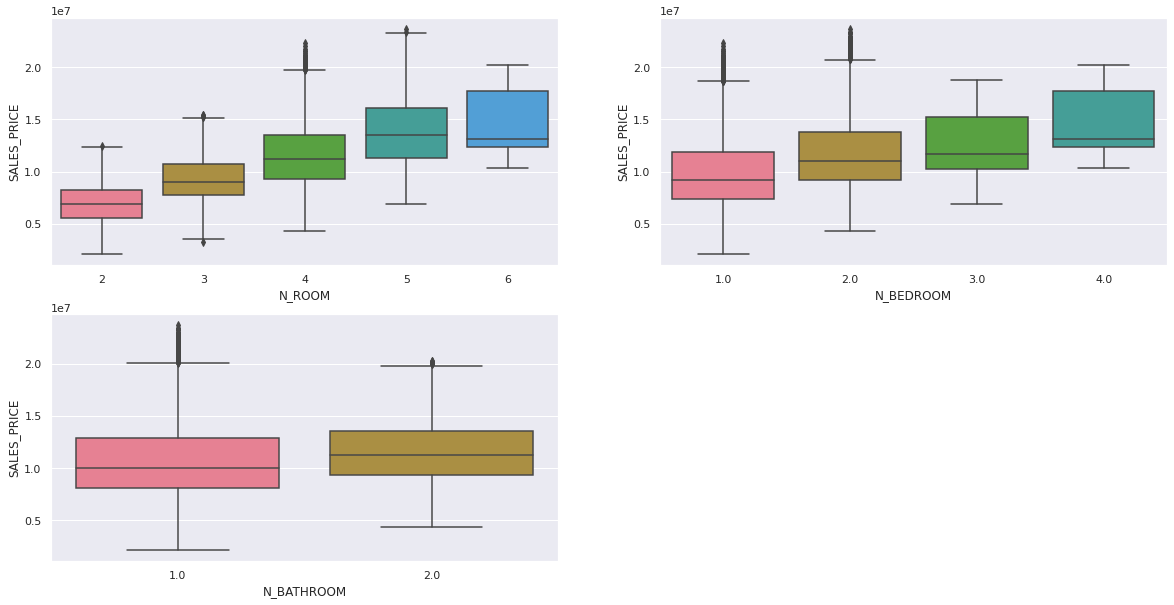

In [ ]:
#this graph shows the sale price according to the no. of bedrooms and bathroom.
#As the number of bedroom and rooms increase the prices are also increasing. 
#therefore, we can say there is a linear relationshiop
#there is a slight increase in the price in case of no. of bathroom as well
sns.color_palette('pastel')
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.boxplot(x="N_ROOM", y="SALES_PRICE", data=dataset)
plt.subplot(222)
sns.boxplot(x='N_BEDROOM', y='SALES_PRICE', data=dataset)
plt.subplot(223)
sns.boxplot(x='N_BATHROOM', y='SALES_PRICE', data=dataset)
plt.show()

This graph shows the sale price according to the no. of bedrooms and bathroom.
As the number of bedroom and rooms increase the prices are also increasing. 
Therefore, we can say there is a linear relationshiop
There is a slight increase in the price in case of no. of bathroom as well

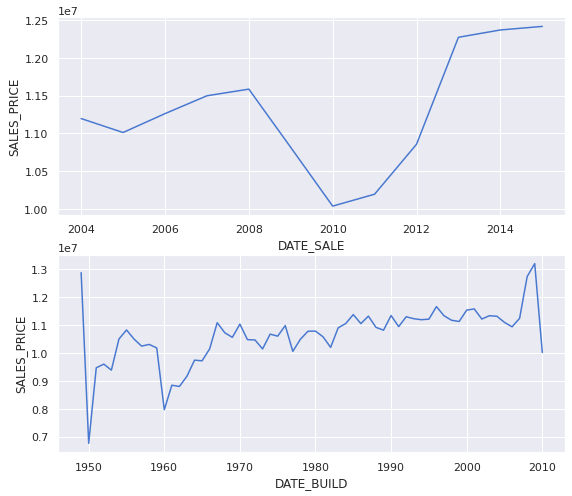

In [ ]:
sns.set_color_codes('muted')
plt.figure(figsize=(20,8))
plt.subplot(221)
sns.lineplot(x="DATE_SALE", y="SALES_PRICE", ci = None, data=dataset, color='b')
plt.subplot(223)
sns.lineplot(x='DATE_BUILD', y='SALES_PRICE', ci = None, data=dataset, color='b')

This graph shows the sale price of the house according to the build date and sale date.
In case of date sale vs sales price, the price of the houses have drastically fallen because of the sub prime crisis of 2008.
But after that the prices have been continuously increasing

In case of dat build vs sale price, the prices are fluctuating but also increased gradually because the less the difference b/w build year and sale year, the better.

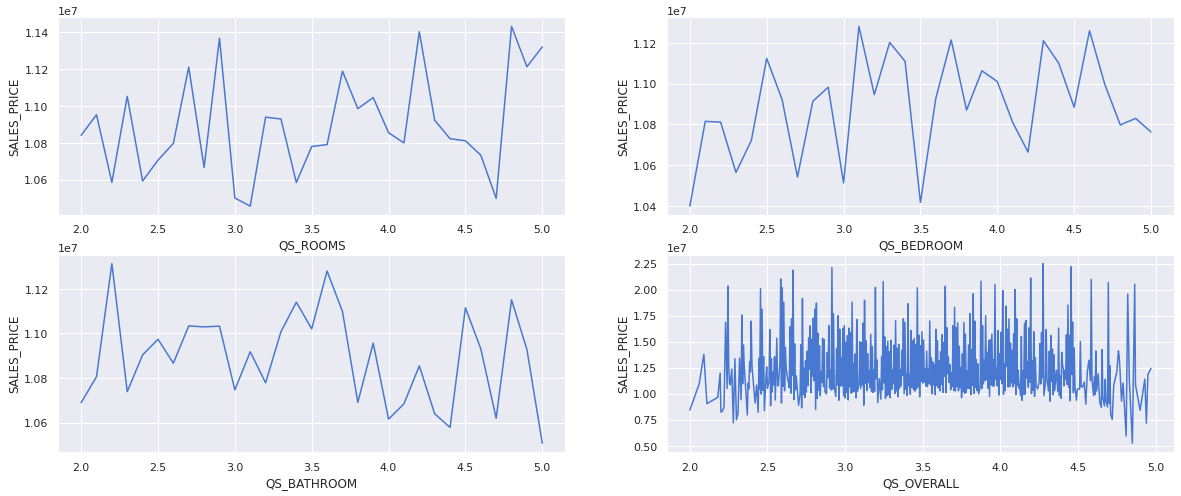

In [ ]:
#QS stands for Quality score according to the website from where the data was collected. 
sns.set_color_codes('muted')
plt.figure(figsize=(20,8))
plt.subplot(221)
sns.lineplot(x="QS_ROOMS", y="SALES_PRICE", ci = None, data=dataset, color='b')
plt.subplot(222)
sns.lineplot(x='QS_BEDROOM', y='SALES_PRICE', ci = None, data=dataset, color='b')
plt.subplot(223)
sns.lineplot(x='QS_BATHROOM', y='SALES_PRICE', ci = None, data=dataset, color='b')
plt.subplot(224)
sns.lineplot(x='QS_OVERALL', y='SALES_PRICE', ci = None, data=dataset, color='b')
plt.show()

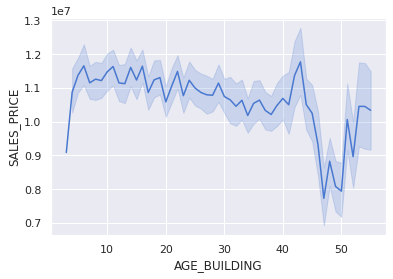

In [ ]:
sns.set_color_codes('muted')
sns.lineplot(x='AGE_BUILDING', y='SALES_PRICE', data=dataset, color='b')

As the age of the building increases the price decreases.
It is clearly evident from the graph that after the age of building reaches 40 the prices have fallen drastically.

Distribution of Features

Text(0.5, 1.0, 'No. of houses vs Area')

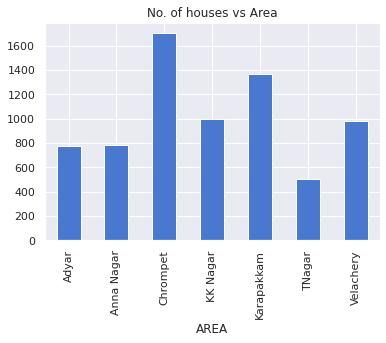

In [ ]:
dataset['AREA'].groupby(dataset['AREA']).count().plot.bar(color='b')
plt.title('No. of houses vs Area')

The above graph shows the distribution of houses in a particular locality. Chrompet has the most no. of houses followed by Karapakkam, KK Nagar and Velachery

Text(0.5, 1.0, 'no. of houses vs Sale Condition')

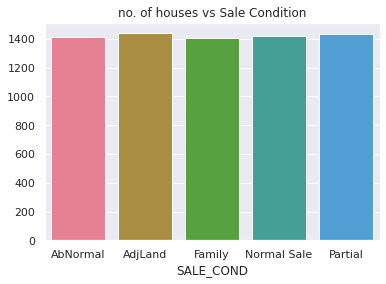

In [ ]:
b = dataset['AREA'].groupby(dataset['SALE_COND']).count()
sns.barplot(x=b.index, y=b.values, data=dataset)
plt.title('no. of houses vs Sale Condition')

The above graph shows the distribution of houses based on the sale condition. House with adjusted Land are more in number.

Text(0.5, 1.0, 'no. of houses vs Utility Available')

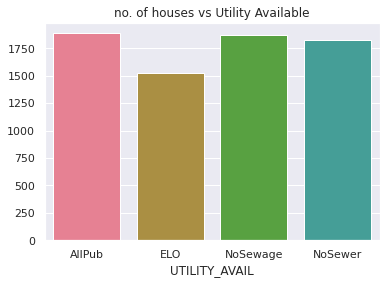

In [ ]:
c = dataset['AREA'].groupby(dataset['UTILITY_AVAIL']).count()
sns.barplot(x=c.index, y=c.values, data=dataset)
plt.title('no. of houses vs Utility Available')

The above graph shows the distribution of houses according to the utility available. House with All public amenities are in high demand. 

Text(0.5, 1.0, 'no. of houses vs Street')

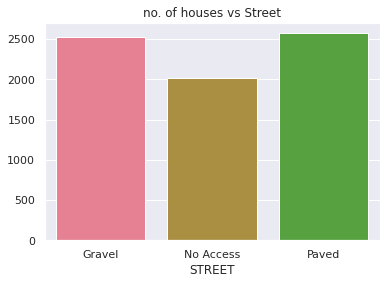

In [ ]:
d = dataset['AREA'].groupby(dataset['STREET']).count()
sns.barplot(x=d.index, y=d.values, data=dataset)
plt.title('no. of houses vs Street')

From the above graph we can see that house with paved street are in more demand followed by houses with Gravel street

Text(0.5, 1.0, 'no. of houses vs Build Type')

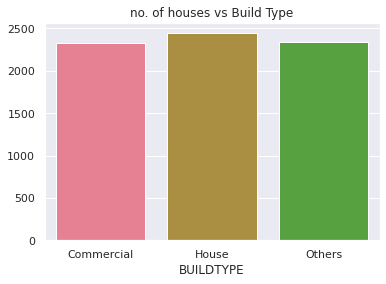

In [ ]:
a = dataset['AREA'].groupby(dataset['BUILDTYPE']).count()
sns.barplot(x=a.index, y=a.values, data=dataset)
plt.title('no. of houses vs Build Type')

From the above graph we can conclude that houses for living purposes are in more demand as compared to the other two variables. 

Text(0.5, 1.0, 'Area wise park facility available')

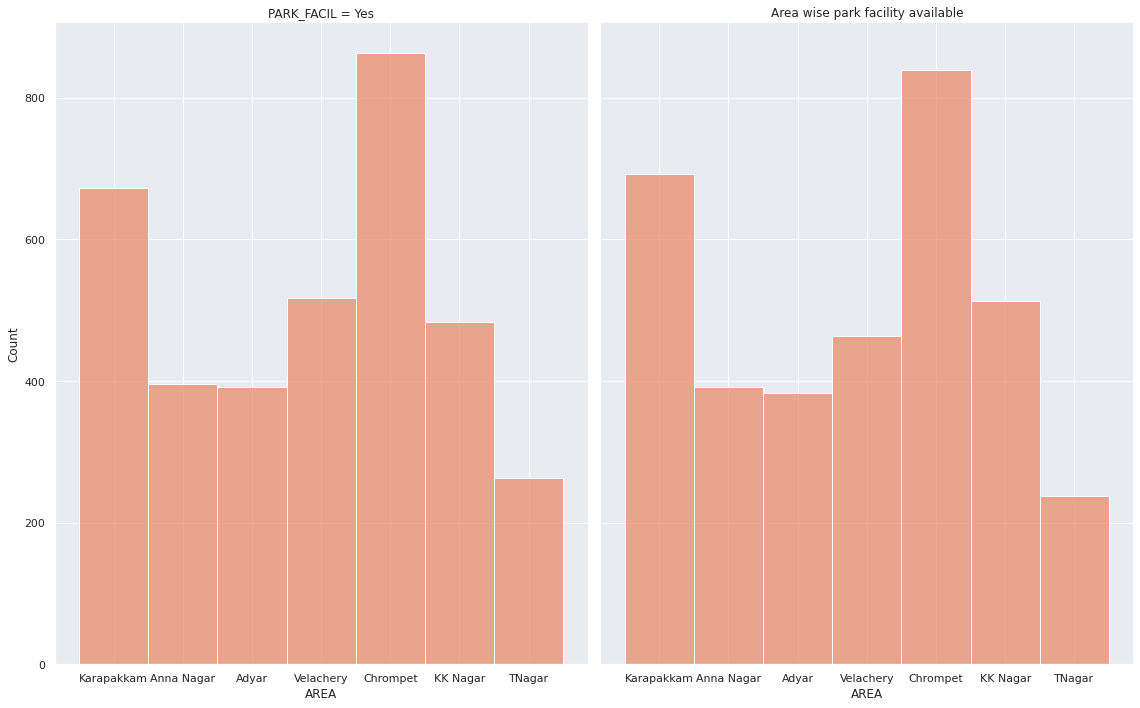

In [ ]:
sns.set_theme(style='darkgrid', palette='flare')
sns.displot(dataset, x='AREA', col='PARK_FACIL', height=10, aspect=.8)
plt.title('Area wise park facility available')

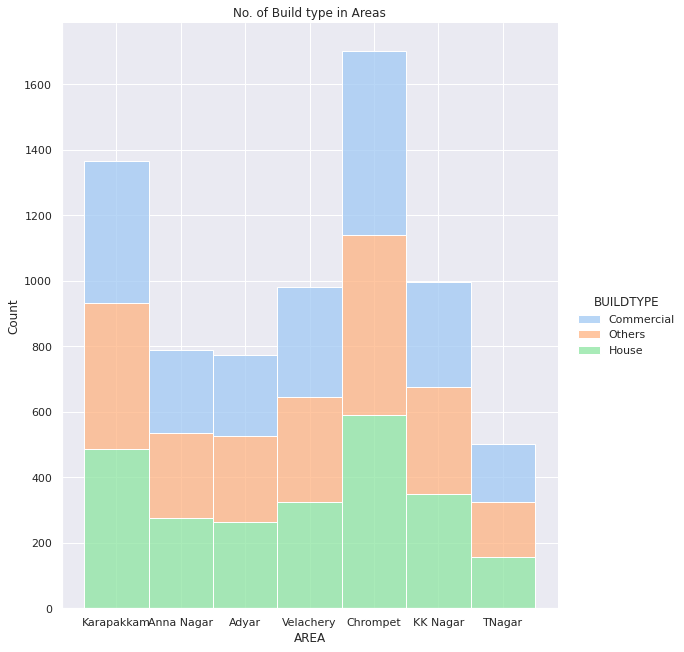

In [ ]:
sns.set_theme(palette = 'pastel')
sns.displot(dataset, x='AREA', hue='BUILDTYPE', multiple = 'stack', height=9, aspect=.9)
plt.title('No. of Build type in Areas')
plt.show()

The above graph shows the area wise buildtype distribution. Houses for living purposes are higher in number as compared to for commercial purposes.

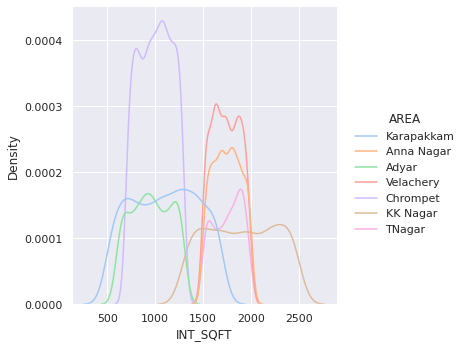

In [ ]:
sns.displot(dataset, x='INT_SQFT', kind='kde', hue='AREA')

The above graph shows the area wise sqft distribution of houses. Karapakkam and Anna Nagar have the houses with  more sqft of area as compared to other areas

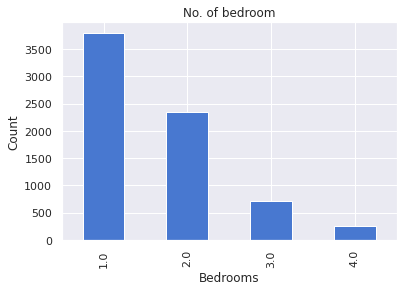

In [ ]:
dataset['N_BEDROOM'].value_counts().plot(kind='bar', color='b')
plt.title('No. of bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

As we can see from the visualization that houses with 1 bedroom are most commonly sold followed by 2 bedrooms

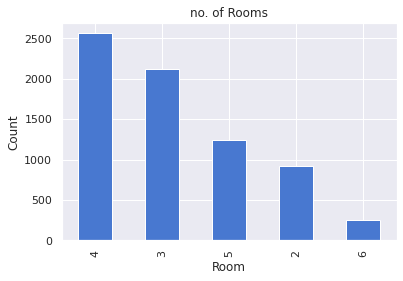

In [ ]:
dataset['N_ROOM'].value_counts().plot(kind='bar', color='b')
plt.title('no. of Rooms')
plt.xlabel('Room')
plt.ylabel('Count')
plt.show()

From the above visualization it can be concluded that houses with 4 rooms are most commonly sold followed by Houses with 3 rooms.

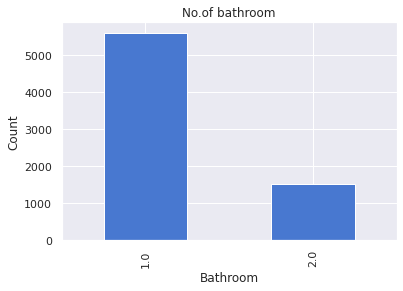

In [ ]:
dataset['N_BATHROOM'].value_counts().plot(kind='bar', color='b')
plt.title('No.of bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.show()

As can be seen from the above graph, the demand for houses with 1 bathroom is high as compared to 2 bathrooms. 

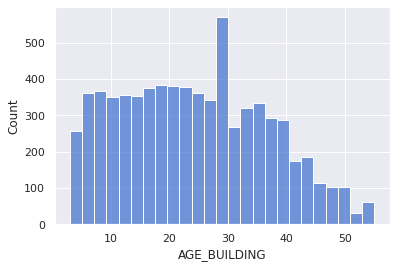

In [ ]:
#dataset['AGE_BUILDING'].value_counts().plot(kind='bar')
#plt.title('Age of building at the time of sale')
#plt.xlabel('Age building')
#plt.ylabel('Count')
#plt.show()
sns.histplot(dataset, x='AGE_BUILDING', color='b')

From the graph, we are concluding the distribution of age of building at the time of sale. The data spans from 5 years to 50 years of buildings. But buildings that are 30 years old are in the demand the most. Whereas as the houses cross the 40 year value their demand has been decreasing.

In [ ]:
#based on the above graphs we will remove certain features 
dataset.drop(['DATE_SALE', 'DATE_BUILD','DIST_MAINROAD','QS_BATHROOM','QS_BEDROOM','QS_ROOMS','QS_OVERALL'], axis=1, inplace=True)

ENCODING OF CATEGORICAL VARIABLES

In [ ]:
Area_map = {'Karapakkam':1, 'Adyar':2, 'Chrompet':3, 'Velachery':4, 'KK Nagar':5, 'Anna Nagar':6, 'TNagar':7}
Sale_cond_map = {'Partial':1, 'Family':2, 'AbNormal':3, 'Normal Sale':4, 'AdjLand':5}
Buildtype = {'House':1, 'Others':2, 'Commercial':3}
Utility_avail = {'ELO':1, 'NoSewage':2, 'NoSewer':3, 'AllPub':4}
street = {'No Access':1, 'Paved':2, 'Gravel':3}
park_facility = {'Yes':1, 'No':2}

In [ ]:
dataset['AREA'] = dataset['AREA'].map(Area_map)
dataset['SALE_COND'] = dataset['SALE_COND'].map(Sale_cond_map)
dataset['BUILDTYPE'] = dataset['BUILDTYPE'].map(Buildtype)
dataset['UTILITY_AVAIL'] = dataset['UTILITY_AVAIL'].map(Utility_avail)
dataset['STREET'] = dataset['STREET'].map(street)
dataset['PARK_FACIL'] = dataset['PARK_FACIL'].map(park_facility)

In [ ]:
dataset.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,SALES_PRICE,ADJ_PRICE,AGE_BUILDING
0,1,1004,1.0,1.0,3,3,1,3,4,2,7600000,7904000.0,44
1,6,1986,2.0,1.0,5,3,2,3,4,3,21717770,22586480.8,11
2,2,909,1.0,1.0,3,3,1,3,1,3,13159200,13685568.0,20
3,4,1855,3.0,2.0,5,2,2,2,3,2,9630290,10015501.6,22
4,1,1226,1.0,1.0,3,3,1,2,4,3,7406250,7702500.0,30


Splitting the data into training and test set

In [ ]:
X=dataset[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','AGE_BUILDING']].values
y=dataset['SALES_PRICE'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
print(X_train.shape, y_train.shape)

(4976, 11) (4976,)


Feature Scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
yhat = regressor.predict(X_test)
print('R2-SCORE: ', metrics.r2_score(y_test, yhat))

R2-SCORE:  0.8376209997939029


Ensemble techniques

In [ ]:
model1 = LinearRegression()
model2 = tree.DecisionTreeRegressor(max_depth=3, random_state = 1)
model3 = KNeighborsRegressor(4)
model = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('knn', model3)])

model.fit(X_train, y_train)
preds = model.predict(X_test)
model.score(X_test, y_test)

0.9072268626428557

Gradient Boost

In [ ]:
boosting = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth=3, min_samples_split = 2, learning_rate = 0.1, loss = 'ls')


In [ ]:
boosting.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(loss='ls', n_estimators=400)

In [ ]:
boosting.score(X_test, y_test)

0.9557772982735857

Gradient Boosting gives the accuracy score of 95%.
The features were: Area, Int_sqft, no. of bedrooms, rooms and bathrooms,sale condition, park facility available, buildtype, utility available, street type and the age of the building.

In [ ]:
print('Price range is: ', dataset.SALES_PRICE.min(),'-', dataset.SALES_PRICE.max())

Price range is:  2156875 - 23667340
